In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.stats import norm


In [10]:
def cauchy_cdf(k, k0, gamma):
    
    return 0.5 + (1/np.pi) * np.arctan((k-k0)/gamma)

def cdfinv_k(k0, gamma, k_min, k_max, value):

    k_array = np.linspace(k_min, k_max, num=1000, endpoint=True)
    k_invcdf_interp = interp1d(cauchy_cdf(k_array, k0, gamma),
                               k_array, kind='cubic',
                               bounds_error=True)
    
    k = k_invcdf_interp((cauchy_cdf(k_max, k0, gamma) - cauchy_cdf(k_min, k0, gamma)) * value + cauchy_cdf(k_min, k0, gamma))
    
    return k


In [50]:
k0 = 0
gamma = 1e-16
k_min = -1e-13
k_max = 1e-13

np.random.seed(0)

val = np.random.rand(10000)
k_samps = cdfinv_k(k0, gamma, k_min, k_max, val)

np.quantile(k_samps, [0.05, 0.5, 0.95])

array([-6.63548854e-16, -2.45753796e-18,  6.17497471e-16])

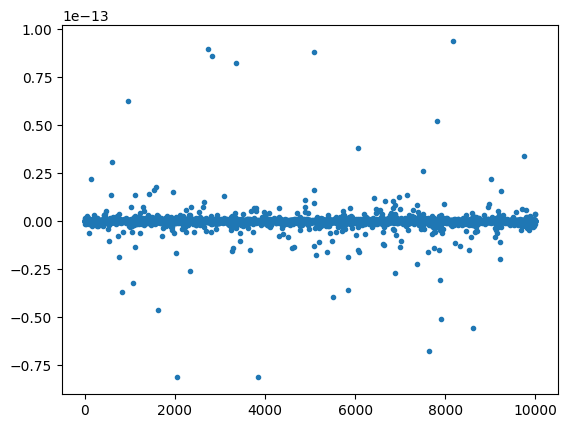

In [44]:
plt.plot(k_samps, '.');